# **DS 3000 Proposal: Predicting Malignancy of Breast Mass Nuclei Cells**
#### Names: Aria Agarwal, Yiyang Bai, Dalton Burkhart, Ethan Van Der Heijden

## 1. Introduction (Problem)
The Wisconsin Breast Cancer Dataset contains information about the characteristics of cell nuclei present in digitized images of fine needle aspirates of breast mass, and extracts quantitative and categorical characteristics of the cells. This includes radius, texture, area, symmetry ect. and categorical data such as the diagnosis of benign or malignant. This data can be used to predict the malignancy of cell nuclei in breast mass, which can inform a breast cancer diagnosis and aid doctors in improving the accuracy of diagnoses. The progonsis for early breast cancer diagnosis is significantly better than a later diagnosis, as the cancer may not have metastasized yet (https://www.cancerresearchuk.org/about-cancer/cancer-symptoms/why-is-early-diagnosis-important/1000#:~:text=Early%20diagnosis%20of%20breast%20cancer,at%20the%20most%20advanced%20stage.) This data can inform breast cancer diagnoses by using machine learning technqiues to predict if cell nuclei are malignant or benign, and determine which attributes most heavily influence malignancy of a cell.

### Key Questions
1. Can we successfully predict whether a breast tumor is benign or malignant using machine learning models trained on cell nuclei characteristics?
2. What are the most crucial features that determine if breast mass is benign or malignant?

## 2. Data Pipeline Overview: Data Source and Loading the Data
 The Wisconsin Breast Cancer Dataset was found on huggingface.co, and has 29 numeric features and 1 one categorical feature indicating  whether the breast mass is benign or malignant. To get the data, the requests.get() function was used with the test and train urls and was loaded into dataframes in the load_data() function. Also, the columns did not include the names, so the original dataset from the University of California Irvine was found to manually match and rename the columns ('https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic'). Then, the clean_data() function is then used to clean the data by adding a column that converts the categorical variable which is represented by M or B for malignant or benign to quantitative variables. The data also contains three statistical subsets of "Mean", "Standard Error" and "Worst" to characterize the data. For visualization purposes, we have filtered the dataset to contain only the means as the standard error and worse are not as effective for visualization.

### 2.1 Loading the Data

In [72]:
import requests
import pandas as pd
import io

def load_data():
    """ Loads the test and train data into dataframes using requests.get()
    
        Args:
            none
            
        Returns:
            train_df (Dataframe): Dataframe for the "train" data from breast cancer dataset
            test_df (Dataframe): Dataframe for the "test" data from breast cancer dataset
    """
    # urls to data
    train_url = "https://huggingface.co/datasets/wwydmanski/wisconsin-breast-cancer/resolve/main/train.csv"
    test_url = "https://huggingface.co/datasets/wwydmanski/wisconsin-breast-cancer/resolve/main/test.csv"

    # uses requests.get() to load the train data
    train_response = requests.get(train_url)
    train_response.raise_for_status() 
    # loads the test data in a dataframe
    train_df = pd.read_csv(io.BytesIO(train_response.content))

    # uses requests.get() to load the test data
    test_response = requests.get(test_url)
    test_response.raise_for_status()  
     # loads the test data in a dataframe
    test_df = pd.read_csv(io.BytesIO(test_response.content))

    # manually sets column names according to UCI dataset 
    column_names = [
        'Index', 'Radius Mean', 'Texture Mean', 'Perimeter Mean', 'Area Mean', 'Smoothness Mean',
        'Compactness Mean', 'Concavity Mean', 'Concave Points Mean', 'Symmetry Mean', 'Fractal Dimension Mean',
        'Radius SE', 'Texture SE', 'Perimeter SE', 'Area SE', 'Smoothness SE',
        'Compactness SE', 'Concavity SE', 'Concave Points SE', 'Symmetry SE', 'Fractal Dimension SE',
        'Radius Worst', 'Texture Worst', 'Perimeter Worst', 'Area Worst', 'Smoothness Worst',
        'Compactness Worst', 'Concavity Worst', 'Concave Points Worst', 'Symmetry Worst', 'Fractal Dimension Worst',
        'Diagnosis'
    ]

    # sets the column names
    train_df.columns = column_names
    test_df.columns = column_names
    
    train_df = train_df.drop(columns=['Index'])
    test_df = test_df.drop(columns=['Index'])

    return train_df, test_df
train_df, test_df = load_data()
train_df

,Radius Mean,Texture Mean,Perimeter Mean,Area Mean,Smoothness Mean,Compactness Mean,Concavity Mean,Concave Points Mean,Symmetry Mean,Fractal Dimension Mean,...,Texture Worst,Perimeter Worst,Area Worst,Smoothness Worst,Compactness Worst,Concavity Worst,Concave Points Worst,Symmetry Worst,Fractal Dimension Worst,Diagnosis
0,11.800,17.26,75.26,431.9,0.09087,0.06232,0.02853,0.01638,0.1847,0.06019,...,24.49,86.00,562.0,0.1244,0.1726,0.14490,0.05356,0.2779,0.08121,B
1,15.750,20.25,102.60,761.3,0.10250,0.12040,0.11470,0.06462,0.1935,0.06303,...,30.29,125.90,1088.0,0.1552,0.4480,0.39760,0.14790,0.3993,0.10640,M
2,14.760,14.74,94.87,668.7,0.08875,0.07780,0.04608,0.03528,0.1521,0.05912,...,17.93,114.20,880.8,0.1220,0.2009,0.21510,0.12510,0.3109,0.08187,B
3,14.960,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,0.1879,0.05852,...,26.19,109.10,809.8,0.1313,0.3030,0.18040,0.14890,0.2962,0.08472,B
4,13.430,19.63,85.84,565.4,0.09048,0.06288,0.05858,0.03438,0.1598,0.05671,...,29.87,116.60,993.6,0.1401,0.1546,0.26440,0.11600,0.2884,0.07371,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,9.436,18.32,59.82,278.6,0.10090,0.05956,0.02710,0.01406,0.1506,0.06959,...,25.02,75.79,439.6,0.1333,0.1049,0.11440,0.05052,0.2454,0.08136,B
422,15.460,11.89,102.50,736.9,0.12570,0.15550,0.20320,0.10970,0.1966,0.07069,...,17.04,125.00,1102.0,0.1531,0.3583,0.58300,0.18270,0.3216,0.10100,M
423,14.580,21.53,97.41,644.8,0.10540,0.18680,0.14250,0.08783,0.2252,0.06924,...,33.21,122.40,896.9,0.1525,0.6643,0.55390,0.27010,0.4264,0.12750,M
424,12.870,19.54,82.67,509.2,0.09136,0.07883,0.01797,0.02090,0.1861,0.06347,...,24.38,95.14,626.9,0.1214,0.1652,0.07127,0.06384,0.3313,0.07735,B


### 2.2 Cleaning the Data

In [73]:
def clean_features(df):
    """ Cleans the data by converting the categorical Diagnosis column to a quantitative column
    
        Args:
            df (dataframe): Either the test or train data containing breast cancer characteristics
            
        Returns:
            result (dataframe): Cleaned dataframe containing quantitatve values for diagnosis
    """
    # creates copy of the results dataframe
    result = df.copy()
    # replaces the categorical M and B with 1 and 0
    result['Malignant'] = result['Diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
    return result

In [74]:
simple_train_df = clean_features(train_df)
simple_test_df = clean_features(test_df)

simple_train_df

,Radius Mean,Texture Mean,Perimeter Mean,Area Mean,Smoothness Mean,Compactness Mean,Concavity Mean,Concave Points Mean,Symmetry Mean,Fractal Dimension Mean,...,Perimeter Worst,Area Worst,Smoothness Worst,Compactness Worst,Concavity Worst,Concave Points Worst,Symmetry Worst,Fractal Dimension Worst,Diagnosis,Malignant
0,11.800,17.26,75.26,431.9,0.09087,0.06232,0.02853,0.01638,0.1847,0.06019,...,86.00,562.0,0.1244,0.1726,0.14490,0.05356,0.2779,0.08121,B,0
1,15.750,20.25,102.60,761.3,0.10250,0.12040,0.11470,0.06462,0.1935,0.06303,...,125.90,1088.0,0.1552,0.4480,0.39760,0.14790,0.3993,0.10640,M,1
2,14.760,14.74,94.87,668.7,0.08875,0.07780,0.04608,0.03528,0.1521,0.05912,...,114.20,880.8,0.1220,0.2009,0.21510,0.12510,0.3109,0.08187,B,0
3,14.960,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,0.1879,0.05852,...,109.10,809.8,0.1313,0.3030,0.18040,0.14890,0.2962,0.08472,B,0
4,13.430,19.63,85.84,565.4,0.09048,0.06288,0.05858,0.03438,0.1598,0.05671,...,116.60,993.6,0.1401,0.1546,0.26440,0.11600,0.2884,0.07371,M,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,9.436,18.32,59.82,278.6,0.10090,0.05956,0.02710,0.01406,0.1506,0.06959,...,75.79,439.6,0.1333,0.1049,0.11440,0.05052,0.2454,0.08136,B,0
422,15.460,11.89,102.50,736.9,0.12570,0.15550,0.20320,0.10970,0.1966,0.07069,...,125.00,1102.0,0.1531,0.3583,0.58300,0.18270,0.3216,0.10100,M,1
423,14.580,21.53,97.41,644.8,0.10540,0.18680,0.14250,0.08783,0.2252,0.06924,...,122.40,896.9,0.1525,0.6643,0.55390,0.27010,0.4264,0.12750,M,1
424,12.870,19.54,82.67,509.2,0.09136,0.07883,0.01797,0.02090,0.1861,0.06347,...,95.14,626.9,0.1214,0.1652,0.07127,0.06384,0.3313,0.07735,B,0


## 3. Using the Data to Solve the Problem: Creating Visualizations
This analysis will create scatterplots and histograms to visualize the spread of the data

### 3.1 Creating a Heatmap

In [75]:
# Shows correlations for a subset of the data containing only the means
# Uses the "Malignant" column which contains the diagnosis 
simple_train_df.filter(regex=r"(Mean)|(Malignant)$").corr()["Malignant"]

Radius Mean               0.717380
Texture Mean              0.430865
Perimeter Mean            0.731142
Area Mean                 0.693843
Smoothness Mean           0.353000
Compactness Mean          0.594631
Concavity Mean            0.695752
Concave Points Mean       0.772141
Symmetry Mean             0.343494
Fractal Dimension Mean   -0.013098
Malignant                 1.000000
Name: Malignant, dtype: float64

Text(0.5, 1.0, 'Heatmap of dataset')

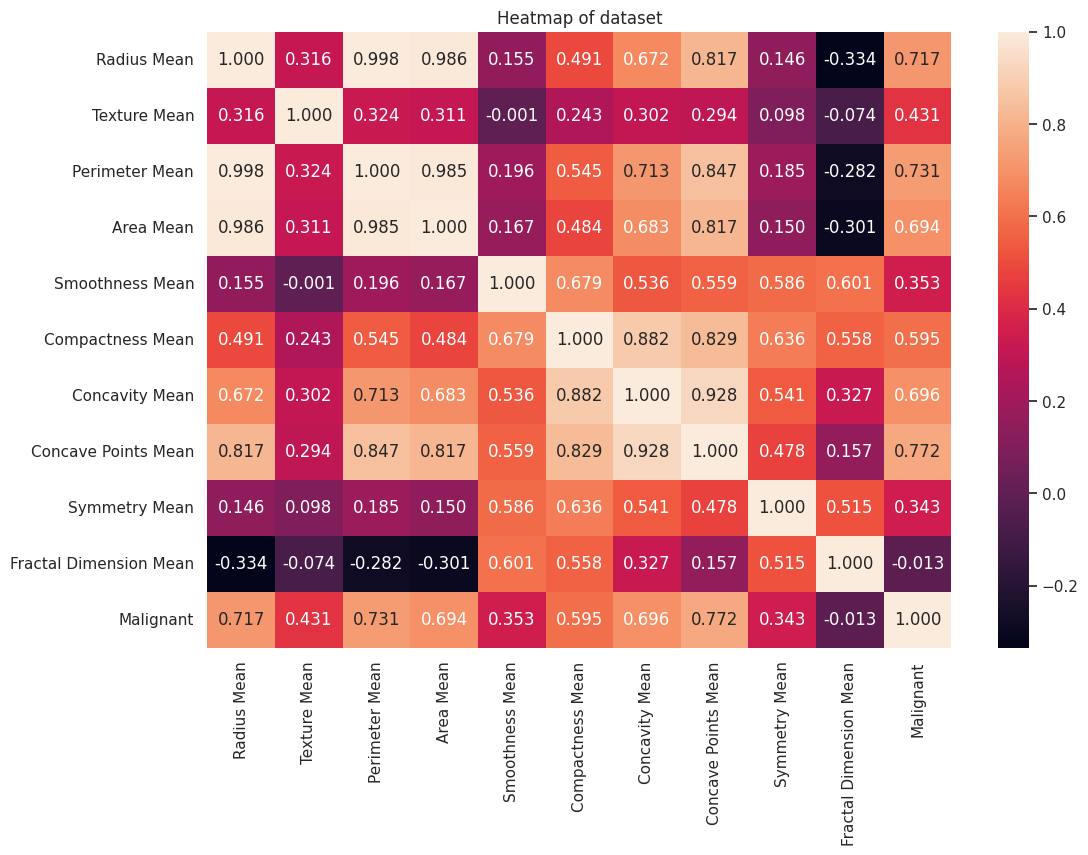

In [76]:
import seaborn as sns
sns.set_theme(rc={'figure.figsize':(12,8)})
# plots a heatmap and uses the subset of the data that contains only the means, not standard error or worst 
sns.heatmap(simple_train_df.filter(regex=r"(Mean)|(Malignant)$").corr(), annot=True, fmt=".3f").set_title("Heatmap of dataset")


### Heatmap Analysis
This heat map demonstrates the correlation between each variable for the "Means" subset of the dataset. Some significant points from the heatmap include Concave points and radius, Compactness and Concavity, and Area and Concave points. The last row of the heatmap represents the correlations between each feature and the diagnosis, in which the features with the highest correlation appear to be radius, perimeter, and concave points. Closely following, other significant features with scores just slightly lower are the area, compacntess and concavity. These features make sense to be highly correlated to the diagnosis because according to scientific literature, the National Institute of Health, "Larger mean values of radius, perimeter, area, compactness, concavity, and concave points of the cell image tend to indicate malignant tumors". (https://pmc.ncbi.nlm.nih.gov/articles/PMC8612371/#:~:text=Overall%2C%20smaller%20mean%20values%20of,tend%20to%20indicate%20malignant%20tumors.) These results show that the data seems to be following biological trends, and that the feature variation does have an effect on the diagnosis of a breast tumor. 

### 3.2 Creating Subplots

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

def make_scatterplots(df, x_column, hue_column = 'Malignant'):
    '''Creates a subplot with every other column

        df (Pandas Dataframe): Dataframe to get data from
        x_column (String): column from the dataframe we will use as the x-axis in all subplots
        hue_column (String): hue we will use for each subplot (default is 'Malignant')
    '''
    # Get all y columns
    y_columns = [column for column in df.columns if column != x_column and column != hue_column and column.endswith("Mean")]

    # Define the grid dimensions
    rows, cols = 3, 3

    # Set up the subplots grid
    figure, axes = plt.subplots(nrows = rows, ncols = cols, figsize=(5 * cols, 4 * rows))
    
    # Flatten into a 1D array for easier iteration
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    # Loop through each subplot and y-column and create a scatter plot
    for ax, y_column in zip(axes, y_columns):
        # Create a scatterplot for that subplot and y-column
        sns.scatterplot(data = df, x = x_column, y = y_column, hue = hue_column, ax=ax)
        # Give it an appropriate title
        ax.set_title(f'{y_column} vs {x_column}')

    # Hide the unused subplots at the bottom right (index 20)
    figure.delaxes(axes[-1])
    figure.delaxes(axes[-2])

    # Fix format
    plt.tight_layout()
    plt.show()

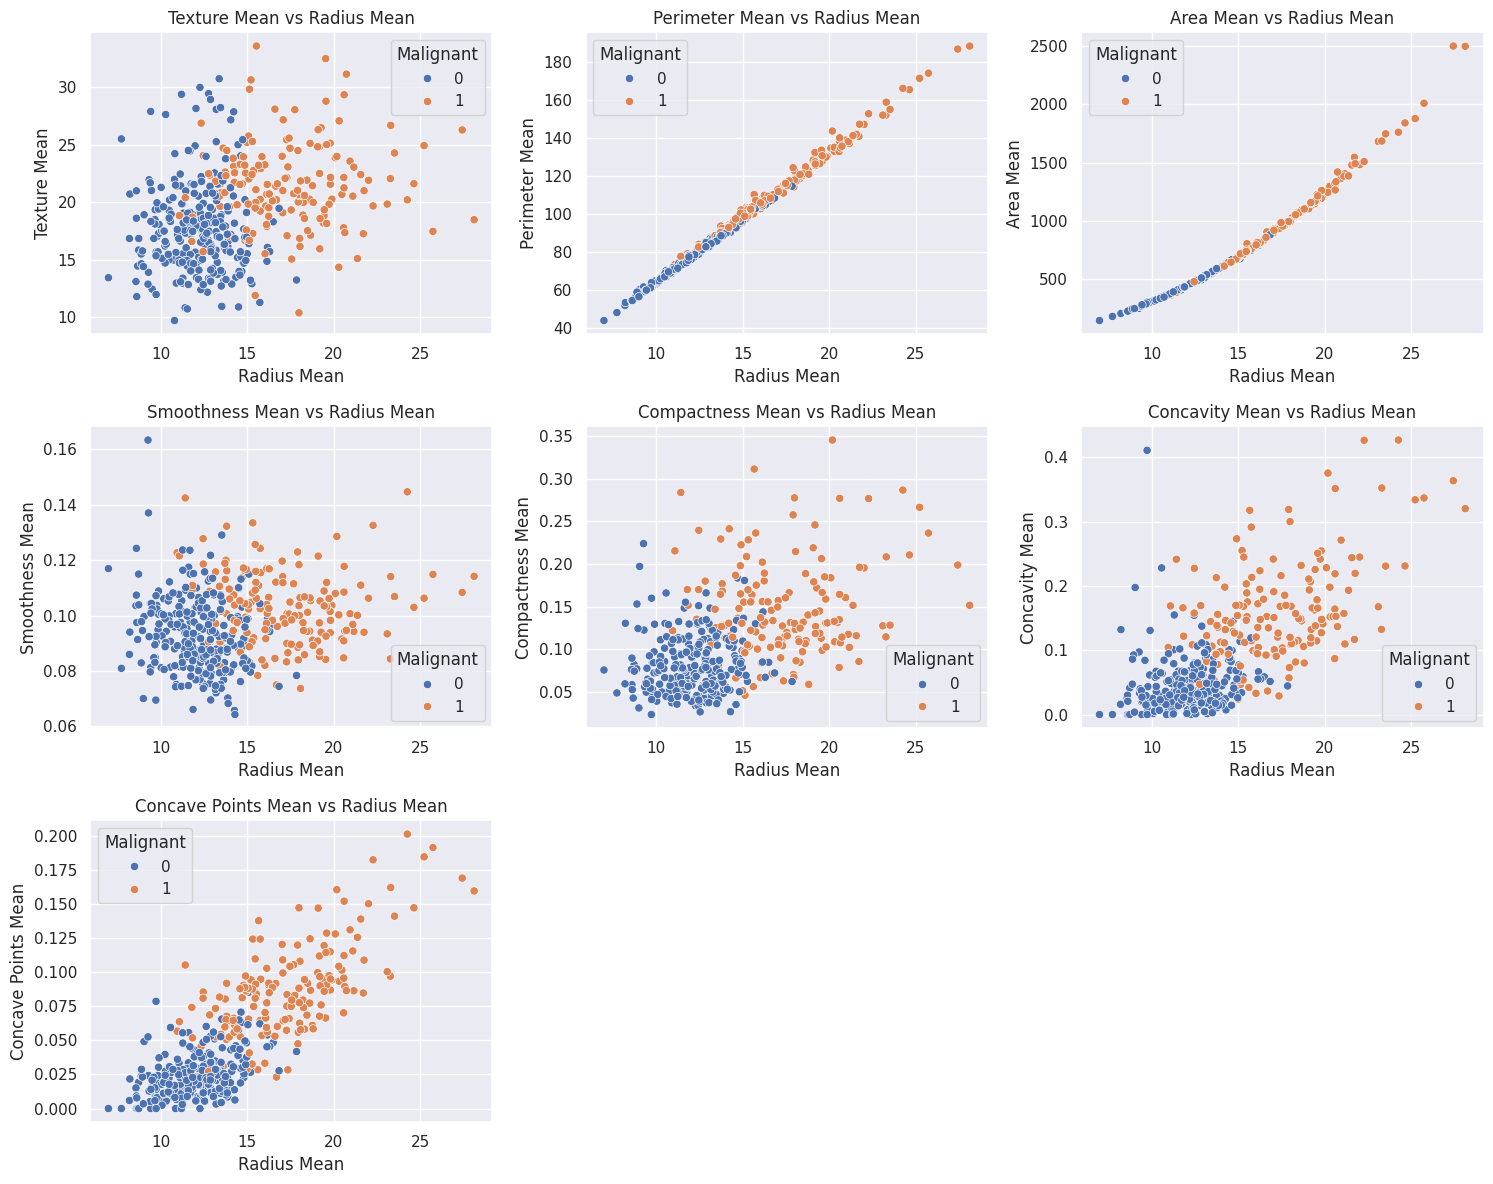

In [78]:
make_scatterplots(simple_train_df, "Radius Mean")

### **Subplot Analysis**
The radius of the breast mass was chosen as the x axis for the subplots because if the mass is malignant, the size of the mass can help indicate what stage of cancer the patient has, or what the extent of metastasis is (https://www.cancercenter.com/cancer-types/breast-cancer/stages/tumor-size-chart). Some of the plot show expected results, for example Perimeter mean versus Radius mean and Area mean versus Radius mean both have strong positive correlations, because as the radius of a mass increases, the perimeter and area are expected to increase as well. However, there are some plots that reveal new trends in the data, such as Compactness mean versus Radius mean, shows a slight positive correlation between the radius and compactness of a mass. A more compact or dense tumor can be an accurate predictor of malignancy, which is depicted in this plot as the radius mean increases the compactness mean increases as well (https://pmc.ncbi.nlm.nih.gov/articles/PMC3029888/). Another plot of interest is the Concave points mean versus the Radius mean, as according to scientific literature breast masses with few to no concave points are more likely to be benign than masses that have more concave points (https://pmc.ncbi.nlm.nih.gov/articles/PMC3043900/). On the plot there is a strong positive correlation between the radius mean and concave mean, which demonstrates how as the radius increases, the concave points mean increases. Also the blue benign points are clustered towards the left bottom, while maligant orange points spread to the top right of the graph. One plot that does not follow observed scientific trends is the Fractal Dimension mean versus the radius mean. The fractal dimension of breast mass quantifies how irregular the  mass by factoring characteristics such as shape, density contour or concavity (https://pmc.ncbi.nlm.nih.gov/articles/PMC3043900/). Malignant tumors tend to have higher fractal dimensions, and increase as the cancer progresses throughout stages 1-4 (https://www.mdpi.com/2673-4125/2/1/5#:~:text=The%20actual%20fractal%20dimensions%20of,1.7284%20for%20stage%20III%20cancer.). However, according to the plot, there is not a clear correlation between radius and fractal dimension, and the points seem to be split more according to radius. This data can be analyzed further through histograms to give more insight to the trends. 

### 3.3 Additional Insightful Scatterplots

In [79]:
import seaborn as sns
sns.set_theme()

In [80]:
def make_scatter(df, x_column, y_column, hue_column):
    ''' Make a sample scatterplot of data
    
        df (Pandas Dataframe): the dataframe to get the data
        x (String): the x-axis to get from the dataframe
        y (String): the y-axis to get from the dataframe
        hue_column (String): What to color the plot by (defaults to 'Diagnosis')
    '''
    # Plots scatterplot
    sb.scatterplot(df, x_column, y_column, hue_column)

Text(0.5, 1.0, 'Smoothness Mean vs Compactness Mean')

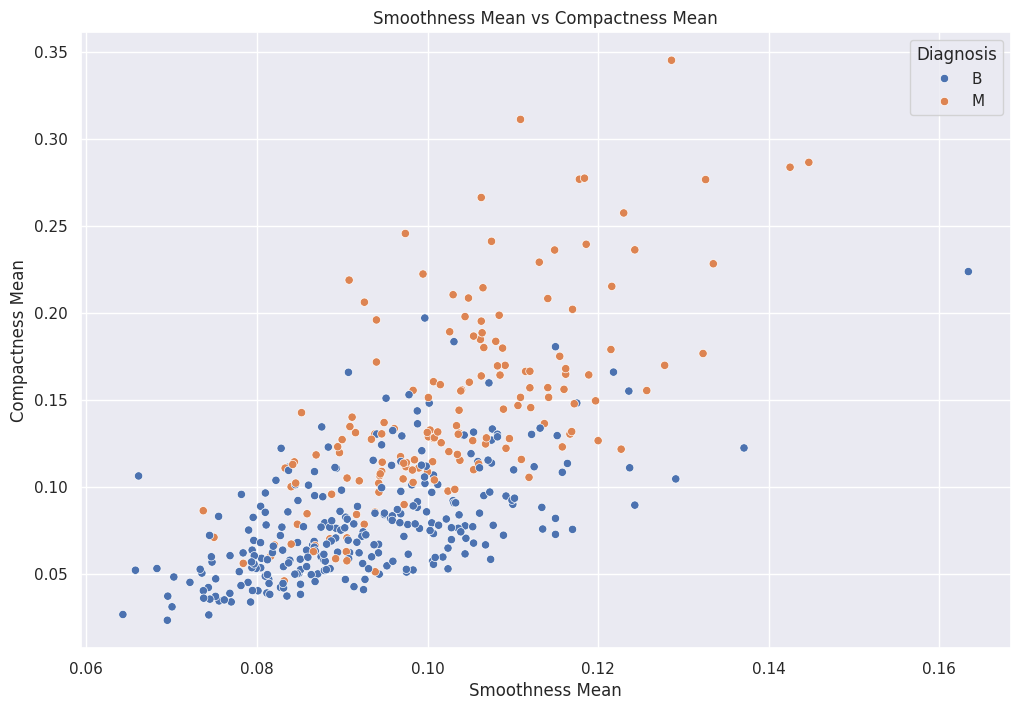

In [81]:
# Calls function to plot scatterplot for smoothness and compactness mean
x = "Smoothness Mean"
y = "Compactness Mean"
sns.scatterplot(simple_train_df, x = x, y = y, hue = "Diagnosis")
# Sets title of graph 
plt.title(f'{x} vs {y}')

### Smoothness versus Compactness Analysis
There is a slight positive correlation between smoothness mean and compactness mean, and most of the blue benign points are clustered towards the bottom left of the graph while the orange malignant points are spread out across the upper right portion of the graph. As the smoothness mean seems to increase, the compactness mean seems to increase as well. As for the biological trends within the data, it has been observed that as the compactness of a tumour increases, there is a higher likleyhood for malignancy due to the density of the mass increasing (https://pmc.ncbi.nlm.nih.gov/articles/PMC3029888/). However, maligant breast masses are less likely to be smooth and are more prone to being hard and irregular shaped (https://www.massgeneralbrigham.org/en/about/newsroom/articles/what-does-a-breast-cancer-lump-feel-like#:~:text=Shape%20and%20size%20of%20a%20breast%20lump&text=A%20cancerous%20lump%20is%20usually,the%20surface%20of%20the%20skin.). The trends shown in this scatterplot would be expected to be slightly negative, as the smoothness increases we would expect the compactness to decrease, as more compact masses are expected to be malignant and smoother masses are expected to be benign. 

Text(0.5, 1.0, 'Concavity Mean vs Compactness Mean')

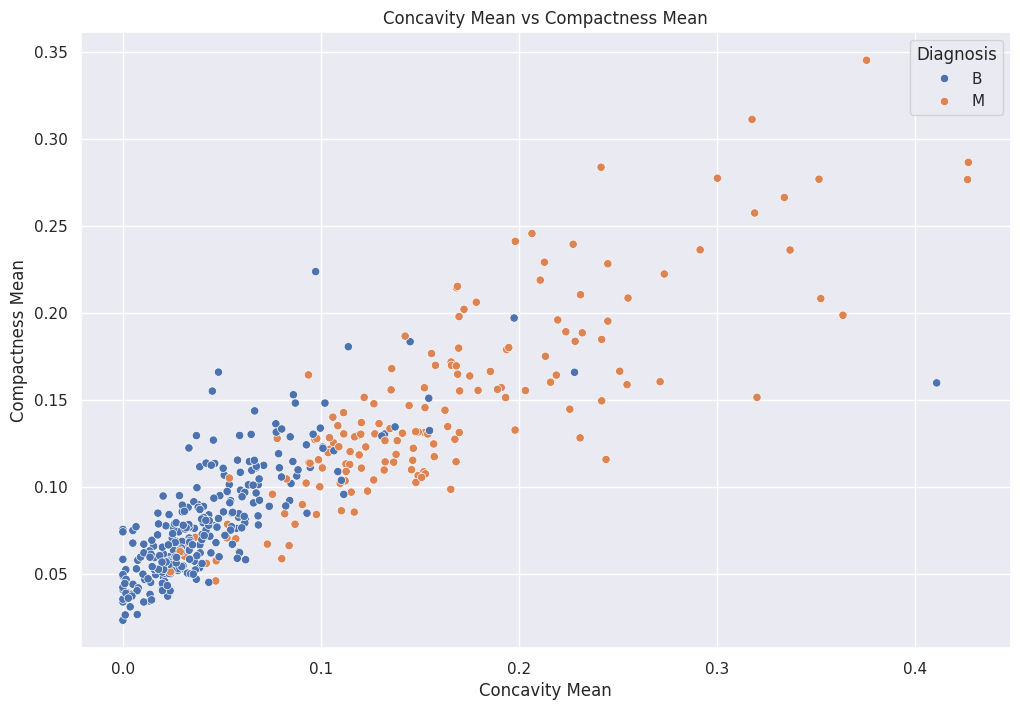

In [82]:
# Calls function to plot scatterplot for Concavity and Compactness mean
x = "Concavity Mean"
y = "Compactness Mean"
sns.scatterplot(simple_train_df, x = x, y = y, hue = "Diagnosis")
# Sets title of graph 
plt.title(f'{x} vs {y}')

### Concavity versus Texture Analysis
This graph displays a very strong positive correlation between concavity and compactness, as the concavity increases the compactness also seems to increase. The blue benign points are culstered towards the bottom left while the orange malignant points are spread towards the top right. This could be because tumors that have more concave points have a higher chance of being malignant, and compactness and density are also indicitve of malignancy according to scientific literature

### 3.4 Creating Histograms

In [83]:
def make_histogram(df, x_column, hue_column = 'Diagnosis'):
    ''' Make a sample histogram of data

        df (Pandas Dataframe): the dataframe to get the data
        x (String): the x-axis to get from the dataframe
        hue_column (String): What to color the plot by (defaults to 'Diagnosis')
    '''
    # plots histogram 
    sns.histplot(df, x= x_column, hue = hue_column)

Text(0.5, 1.0, 'Distribution of Radius Mean')

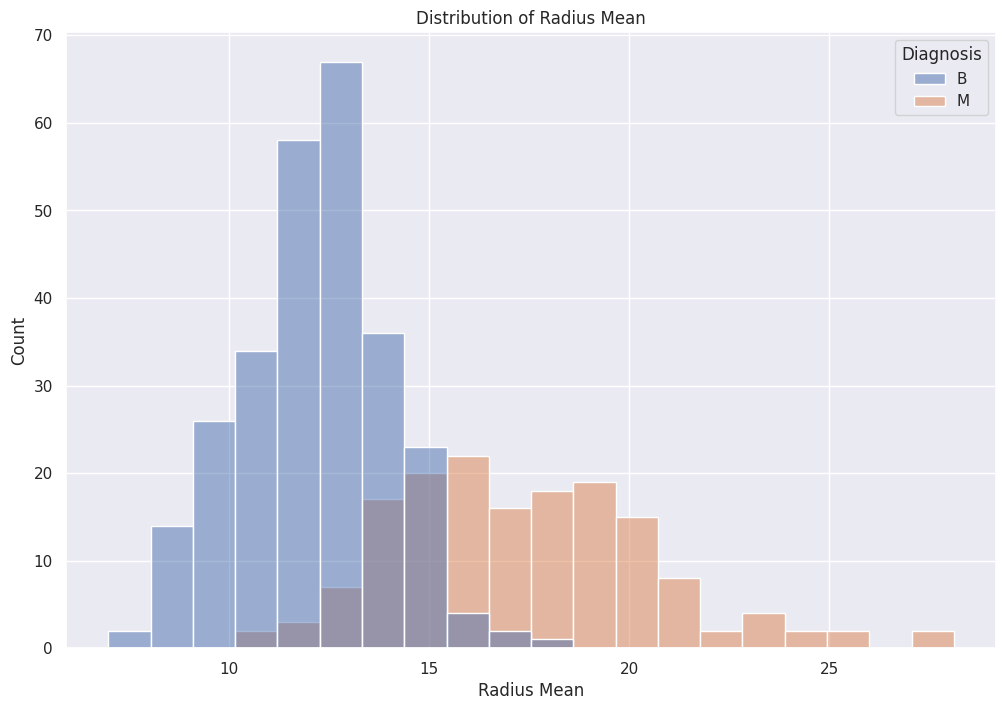

In [84]:
# Calls function to plot histogram
x_column = "Radius Mean"
make_histogram(simple_train_df, x_column)
# Sets title of graph 
plt.title(f'Distribution of {x_column}')

### Radius Histogram Analysis
The histogram corroberates the trends shown in the scatterplots above, as there is a clear seperation between the benign and malignant groups. The benign group is uniform and bell-shaped, and the malignant group is also relatively uniform but slightly skewed to the right. The peaks are at about 13 for benign and there are 2 small peaks at around 16 and 18 for the radius means. There is a very slight overlap between the two hisograms, but an overall distinct seperation between the two indicating that the radius means are correlated to the diagonis of malignant or benign. 

Text(0.5, 1.0, 'Distribution of Fractal Dimension Mean')

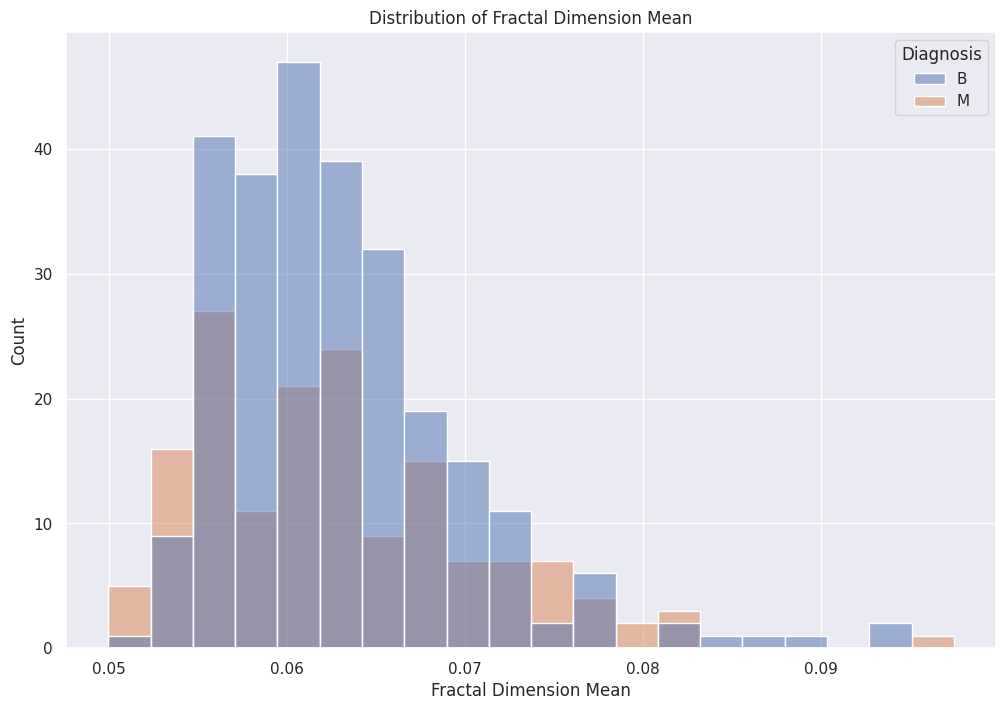

In [85]:
# Calls function to plot histogram
x_column = "Fractal Dimension Mean"
make_histogram(simple_train_df, x_column)
# Sets title of graph
plt.title(f'Distribution of {x_column}')

### Fractal Dimension Analysis
As explained in the subplot analysis of scatterplots above, according to scientific literature the Fractal dimension mean is expected to increase as the malignancy and severity of cancer progresses, but according to the histogram both groups of benign and maligant tumors seem to follow similar trends. Both groups are slightly skewed to the right, with means of about 0.06 for benign and 0.065 for malignant, and both groups have outliers past 0.09. The benign group also seems to be more uniform as the maligant group has two peaks of about 0.055 and 0.065, but this may be due to there being more data for the benign group than maligant. 

# **Phase III: First ML Proof of Concept**

## 1. Machine Learning Plan
Since we are dealing with classification, our plan is to use a machine learning model such as linear perceptron, with some others such as logistic regression later on. For our data, since they are the only ones valuable in predictions, we will only use the Mean columns.

In [86]:
import numpy as np
from sklearn.linear_model import SGDClassifier

In [87]:
def standardize_df(df):
    """ Standardizes the data using mean and standard deviations
    
    Args:
        df (Dataframe): Dataframe of features and diagnosis
        
    Returns:
        result (Dataframe): Clean dataframe with standardized columns
    """
    # Makes copy of dataframe with needed columns
    result = df.copy().drop(columns=["Malignant", "Diagnosis"])
    result = result.filter(regex=r"(Mean)|(Malignant)$")
    # Standardizes the data by subtracting from the mean and dividing by standard deviation
    result = (result - result.mean()) / result.std()
    result["Malignant"] = df["Malignant"]
    return result

In [88]:
standard_train_df = standardize_df(simple_train_df)
standard_test_df = standardize_df(simple_test_df)
standard_train_df.columns

Index(['Radius Mean', 'Texture Mean', 'Perimeter Mean', 'Area Mean',
       'Smoothness Mean', 'Compactness Mean', 'Concavity Mean',
       'Concave Points Mean', 'Symmetry Mean', 'Fractal Dimension Mean',
       'Malignant'],
      dtype='object')

<h1>More modular linear perceptron (controls the number of features)</h1>

In [89]:
import plotly.express as px

In [90]:
def prepare_perceptron_data(df, features):
    """
    Prepares X and y arrays needed to create perceptron model
    
    Args:
        df (Dataframe): Clean dataframe of features and diagnosis. The data must have been normalized.

    Returns:
        X (Array): Array of feature data including bias column
        y (Array) : Array of diagnosis data encoded as -1 and 1
    """
    # Gets feature values
    feature_vals = df[features].values
    ones = np.ones((feature_vals.shape[0], 1))
    X = np.concatenate((ones, feature_vals), axis=1)
    y = df["Malignant"].values.copy()
    y[y == 0] = -1
    return (X, y)


In [91]:
def linear_perceptron(standard_train_df, features):
    """
    Trains a linear perceptron given the standardized dataframe a list of features to use.
    Also prints out the accuracy when compared to the training data.
    
    Args:
        standard_train_df (Dataframe): Cleaned dataframe with features and diagnosis
        features (List): List of feature names to use in the perceptron model 
        
    Returns:
        w: The final weights of the linear perceptron.
    """
    # Prepare training data with specified features
    X, y = prepare_perceptron_data(standard_train_df, features)
    # Initialize weight vector
    w = np.ones(X.shape[1])

    # Initial values (experimental)
    MAX_ITERS = 10_000
    LEARNING_RATE = 0.00001

    iter = 0
    loss = 999_999
    # Loop until we get to max iterations or the loss becomes negative
    while iter <= MAX_ITERS and loss > 0:
        loss = 0
        # For each iteration, go through all i rows
        for i in range(len(y)):
            # Make a prediction
            pred_y = np.dot(X[i], w)
            # Hinge loss function
            hinge_loss = max(0, -y[i] * pred_y)
            # Only update w if we get the prediction wrong (hinge loss is not 0)
            if hinge_loss > 0:
                w = w + LEARNING_RATE * y[i] * X[i]
            # Accumulate loss (will always be a negative number, so loss gets smaller)
            loss += hinge_loss

        # Print out every 10 iterations
        if iter % 10 == 0:
            print(f"Iteraction: {iter}, Loss: {loss}")
        
        # Accmulate iterations after going through entire dataset once
        iter += 1
    
    # Check for cross validation accuracy and print out results
    correct = 0
    for i in range(len(y)):
        pred_y = np.dot(X[i], w)
        pred_label = 1
        if pred_y < 0:
            pred_label = -1
        
        if pred_label == y[i]:
            correct += 1

    print("Cross validation accuracy")
    print(f"Correct: {correct}, Total: {len(y)}, Accuracy: {(correct / len(y)) * 100}%")
    
    # Return final weight vector
    return w

In [92]:
def plot_decision_boundary(feature_1, feature_2):
    """
    Trains a linear perceptron with two features and then builds a dataframe with all the
    datapoints and a decision boundary.

    Args:
        feature_1 (String): Name of the first feature to use in the perceptron model
        feature_2 (String): Name of the second feature to use in the perceptron model
    """
    w = linear_perceptron(standard_train_df, [feature_1, feature_2])

    fig = px.scatter(
        x=standard_train_df[feature_1],
        y=standard_train_df[feature_2],
        color=standard_train_df["Malignant"],
        labels={"x": feature_1, "y": feature_2},
    )
    xlim = -3, 5
    fig.add_shape(
        type="line",
        x0=xlim[0],
        y0=(-w[0] - xlim[0] * w[1]) / w[2],
        x1=xlim[1],
        y1=(-w[0] - xlim[1] * w[1]) / w[2],
        line=dict(
            color="MediumPurple",
            width=2,
            dash="dot",
        ),
    )
    fig.update_layout(yaxis_range=[-3, 3])
    fig.show()

In [93]:
plot_decision_boundary("Concavity Mean", "Compactness Mean")

Iteraction: 0, Loss: 109.48554592201221
Iteraction: 10, Loss: 108.52988345013152
Iteraction: 20, Loss: 107.60713800518593
Iteraction: 30, Loss: 106.69957220574743
Iteraction: 40, Loss: 105.79200640630884
Iteraction: 50, Loss: 104.89023750484016
Iteraction: 60, Loss: 103.99885035252204
Iteraction: 70, Loss: 103.1074632002039
Iteraction: 80, Loss: 102.244232446066
Iteraction: 90, Loss: 101.40054158572356
Iteraction: 100, Loss: 100.58063591980074
Iteraction: 110, Loss: 99.80787383192451
Iteraction: 120, Loss: 99.04573987816819
Iteraction: 130, Loss: 98.2950255659413
Iteraction: 140, Loss: 97.57041016154652
Iteraction: 150, Loss: 96.84928581896972
Iteraction: 160, Loss: 96.13982124784533
Iteraction: 170, Loss: 95.43079157115554
Iteraction: 180, Loss: 94.73461581626835
Iteraction: 190, Loss: 94.04903977890233
Iteraction: 200, Loss: 93.36346374153635
Iteraction: 210, Loss: 92.6778877041703
Iteraction: 220, Loss: 91.99231166680427
Iteraction: 230, Loss: 91.30673562943824
Iteraction: 240, Loss

In [94]:
plot_decision_boundary("Radius Mean", "Concave Points Mean")

Iteraction: 0, Loss: 62.85601834938764
Iteraction: 10, Loss: 61.652583828792395
Iteraction: 20, Loss: 60.489023059579786
Iteraction: 30, Loss: 59.35127991286595
Iteraction: 40, Loss: 58.2931926488324
Iteraction: 50, Loss: 57.26163221484276
Iteraction: 60, Loss: 56.23779011703322
Iteraction: 70, Loss: 55.24172064535467
Iteraction: 80, Loss: 54.26377123985899
Iteraction: 90, Loss: 53.32301747495096
Iteraction: 100, Loss: 52.382263710042956
Iteraction: 110, Loss: 51.4650556765094
Iteraction: 120, Loss: 50.60642013762643
Iteraction: 130, Loss: 49.750550555737135
Iteraction: 140, Loss: 48.94385655216663
Iteraction: 150, Loss: 48.21155189321549
Iteraction: 160, Loss: 47.513358260672085
Iteraction: 170, Loss: 46.815164628128706
Iteraction: 180, Loss: 46.11697099558529
Iteraction: 190, Loss: 45.43629119195181
Iteraction: 200, Loss: 44.791264932953816
Iteraction: 210, Loss: 44.18055717914567
Iteraction: 220, Loss: 43.598767524639186
Iteraction: 230, Loss: 43.031534503771006
Iteraction: 240, Los

In [95]:
plot_decision_boundary("Radius Mean", "Texture Mean")

Iteraction: 0, Loss: 118.86862331383408
Iteraction: 10, Loss: 116.73198787884859
Iteraction: 20, Loss: 114.66720174647601
Iteraction: 30, Loss: 112.64088849441424
Iteraction: 40, Loss: 110.63197220974959
Iteraction: 50, Loss: 108.65130015003038
Iteraction: 60, Loss: 106.71383121117539
Iteraction: 70, Loss: 104.79698468329747
Iteraction: 80, Loss: 102.95366546795466
Iteraction: 90, Loss: 101.15071212111025
Iteraction: 100, Loss: 99.40561226333853
Iteraction: 110, Loss: 97.67453385231782
Iteraction: 120, Loss: 96.0114994462018
Iteraction: 130, Loss: 94.42846173772861
Iteraction: 140, Loss: 92.92159053458178
Iteraction: 150, Loss: 91.50976815392093
Iteraction: 160, Loss: 90.1681430240684
Iteraction: 170, Loss: 88.87892666938698
Iteraction: 180, Loss: 87.6029001325493
Iteraction: 190, Loss: 86.35917068667781
Iteraction: 200, Loss: 85.13974395694545
Iteraction: 210, Loss: 83.97161529630651
Iteraction: 220, Loss: 82.85558912759285
Iteraction: 230, Loss: 81.75518525461392
Iteraction: 240, Los

## Graph Analysis
These graphs are linear perceptron graphs comparing 2 different features of breast mass nuclei cells. The first graph plots Concavity mean and Compactness mean, and the dark blue dots represent a benign mass which is 0, and the yellow dots represent malignant masses which are 1. The loss for the model was relatively low at around 0.008, while the accuracy was relatively high at around 69.48%. The cross validation accuracy for the model was 296 out of 426 correct predictions. The desicion boundary does not visually accurately split the data as well, which could indicate a more complex relationship between Concavity as Compactness. In general, it seems as concavity of a breast mass nuclei cells increase, compactness increases as well. This association is supported by scientific literature, because "benign masses have fewer, if any concave segements than malignant tumors" (https://pmc.ncbi.nlm.nih.gov/articles/PMC3043900/). The second graph analyzes Radius mean and Concave points mean, the loss is around 5.2 while the accuracy is 91.784%. The loss seems to be disproportionately high compared to the accuracy, which may be because of outliers in the data, causing the loss to increase. There are two or three clear outliers where the radius is greater than 1, and concave points are around 0, but it is the only blue benign dot in the cluster. The clustering of the data shows a slight positive association, and scientific literature demonstrates that as the radius increases, concave points should increase as well because both a large radius and concave points in the mass are classic signs of a benign tumor (https://pmc.ncbi.nlm.nih.gov/articles/PMC3043900/). Outliers in the data could also explain why the desicion boundary has a negative slope, because the scatterplot of benign and malignant points seem to be clustered in alignment with scientific literature as the desicion boundary displays accurate linear seperation. The last graph displays Radius versus Texture mean, where the loss is 0.24 and the accuracy is around 88.96%. The descision boundary shows a slight positive correlation, and displays fairly accurate linear seperation between maligant and benign points. However, again the slope of the decision boundary indicates that as radius mean increases texture mean decreases, while scientific literature supports the hypothesis that as radius mean increases texture mean increases as well in malignant tumors (https://pmc.ncbi.nlm.nih.gov/articles/PMC3043900/). This may be because the relationship between Radius and Texture is more complex, or there may be outliers affecting the slope of the desicion boundary. However the data remains linearly seperable. Due to the fact that all three of these graphs are linearly seperable, we can assume that by taking any other pairs of two features, we may get similar results. 

## Ethical Considerations
One ethical consideration includes the role of race and socioeconomic status in diagnosing breast cancer. Black women and hispanic women are diagnosed at a higher rate with more aggresive forms of breast cancer as well as women who live in communities with a lower socioeonomic background (https://pmc.ncbi.nlm.nih.gov/articles/PMC3043900/), (https://pmc.ncbi.nlm.nih.gov/articles/PMC3074597/#:~:text=A%20substantial%20body%20of%20evidence,and%20among%20lower%2Dincome%20women.). If the model were to predict breast cancer diagnoses for points around the desicion boundary where there is a mix of benign and malignant points (blue and yellow points), women from marginalized communities would not be as accurately diagnosed as their intersectional identities because their racial and socioeonomic background were not being taken into consideration. This could introduce racial and economic bias due to the fact that these factors need to be taken into account in the context of healthcare and medical diagnosis in order to provide the best possible care for patients in marginalized communities. Another ethical consideration is that this model is not always 100 percent accurate, and getting medical advice from a healthcare a

## Full perceptron model

In [96]:
features = [
    "Radius Mean",
    "Texture Mean",
    "Perimeter Mean",
    "Area Mean",
    "Smoothness Mean",
    "Compactness Mean",
    "Concavity Mean",
    "Concave Points Mean",
    "Symmetry Mean",
    "Fractal Dimension Mean",
]

w = linear_perceptron(standard_train_df, features)

Iteraction: 0, Loss: 128.0363389689891
Iteraction: 10, Loss: 127.00063912014714
Iteraction: 20, Loss: 125.96493927130521
Iteraction: 30, Loss: 124.94919796695284
Iteraction: 40, Loss: 123.95420075311385
Iteraction: 50, Loss: 122.95920353927485
Iteraction: 60, Loss: 121.96420632543581
Iteraction: 70, Loss: 120.96920911159684
Iteraction: 80, Loss: 119.97421189775785
Iteraction: 90, Loss: 118.99065752658868
Iteraction: 100, Loss: 118.04486692794538
Iteraction: 110, Loss: 117.09907632930202
Iteraction: 120, Loss: 116.1532857306587
Iteraction: 130, Loss: 115.20749513201541
Iteraction: 140, Loss: 114.32126960203334
Iteraction: 150, Loss: 113.44850257368302
Iteraction: 160, Loss: 112.58548094458381
Iteraction: 170, Loss: 111.7227647166015
Iteraction: 180, Loss: 110.86004848861921
Iteraction: 190, Loss: 110.0262813160084
Iteraction: 200, Loss: 109.20734638259613
Iteraction: 210, Loss: 108.38841144918393
Iteraction: 220, Loss: 107.56947651577174
Iteraction: 230, Loss: 106.75054158235947
Iteract

In [97]:
def cross_validation(test_X, test_y, w):
    """
    Perform cross-validation using the provided weight vector.
    Args:
        test_X: Test feature matrix including bias column.
        test_y: Test labels encoded as -1 and 1.
        w: Weight vector including bias.
    """
    correct = 0
    
    for i in range(len(test_y)):
        pred_y = np.dot(test_X[i], w)
        pred_label = 1 if pred_y >= 0 else -1 
        if pred_label == test_y[i]:
            correct += 1
    
    accuracy = (correct / len(test_y)) * 100
    print(f"Cross validation accuracy: {accuracy}%")
    print(f"Correct: {correct}, Total: {len(test_y)}, Accuracy: {(correct / len(test_y)) * 100}%")

test_X, test_y = prepare_perceptron_data(standard_test_df, features)
cross_validation(test_X, test_y, w)

Cross validation accuracy: 93.7062937062937%
Correct: 134, Total: 143, Accuracy: 93.7062937062937%


In [98]:
# JUST FOR FUN: Checked with the SGDClassifier to see how NumPy model was doing
def test_perceptron(X, y, test_X, test_y):
    """
   Tests the perceptron model with the SDG classifier
    
    Args:
        X: Array of feature data including bias column
        y: Array of diagnosis data encoded as -1 and 1
        test_X: Test array of feature data including bias column
        test_y: Test array of diagnosis data encoded as -1 and 1
    """
    perceptron = SGDClassifier(loss='hinge', max_iter=1000, random_state=42, 
                               fit_intercept=False, alpha=0.05, shuffle = False)
    
    perceptron.fit(X, y)
    
    correct = 0
    
    sklearn_pred_ys = perceptron.predict(test_X)
    for i in range(len(test_y)):
        if sklearn_pred_ys[i] == test_y[i]:
            correct += 1
    
    print("Cross validation accuracy - SciKit Learn's SGDClassifier")
    print(f"Correct: {correct}, Total: {len(test_y)}, Accuracy: {(correct / len(test_y)) * 100}%")

X, y = prepare_perceptron_data(standard_train_df, features)
test_perceptron(X, y, test_X, test_y)

Cross validation accuracy - SciKit Learn's SGDClassifier
Correct: 134, Total: 143, Accuracy: 93.7062937062937%


## Full Dataset Analysis
The accuracy when all the features were passed into the linear perceptron function came out to 84.0375%, while the accuracy when the SDG classifer was used came out to 93.706%. While the SDG classifier has a higher accuracy score than our model, it can still be used to fairly accurately predict breast cancer outcomes. However, a concern that is always present when using these models is that no model can be 100% accurate, so it is important for any health concerns to be check by a healthcare provider.

# Phase IV: ML Model with Tensorflow

In [99]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [100]:
def train_lstm(train_df, test_df):
    """ Builds and trains lstm model
    
        Args:
            train_df (Dataframe): Clean dataframe for the "train" data from breast cancer dataset
            test_df (Dataframe): Clean dataframe for the "test" data from breast cancer dataset
    """
    # Creates correlation matrix 
    correlation_matrix = train_df.corr()
    # Drops malignant column
    diag_corr = correlation_matrix['Malignant'].drop('Malignant').sort_values(ascending=False)
    important_feature = diag_corr[diag_corr > 0.67]
    selected_features = list(important_feature.index) + ['Malignant']
    print("Training on features:", selected_features)

    # Filters dataframe for selected features with higher r^2 scores
    filtered_train_df = train_df[selected_features]
    filtered_test_df = test_df[selected_features]

    X_train = filtered_train_df.drop(columns=['Malignant']).to_numpy()
    y_train = filtered_train_df['Malignant'].to_numpy()
    X_test = filtered_test_df.drop(columns=['Malignant']).to_numpy()
    y_test = filtered_test_df['Malignant'].to_numpy()

    #  change to lstm input  (samples, timesteps, features)
    X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    # built lstm model
    model = Sequential()
    model.add(LSTM(3000, activation='tanh', return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(3000, activation='tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    stop_epoches = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    history = model.fit(X_train_lstm, y_train, epochs=200, batch_size=128, validation_data=(X_test_lstm, y_test), callbacks=[stop_epoches])

    y_train_pred = (model.predict(X_train_lstm) > 0.5).astype(int)
    y_test_pred = (model.predict(X_test_lstm) > 0.5).astype(int)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Plot training and validation accuracy
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training vs Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    print(f'training set accuracy: {train_accuracy:.4f}')
    print(f'test set accuracy: {test_accuracy:.4f}')

Training on features: ['Concave Points Mean', 'Perimeter Mean', 'Radius Mean', 'Concavity Mean', 'Area Mean', 'Malignant']


/home/ethan/.venv/ds3000/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 504ms/step - accuracy: 0.8847 - loss: 0.6252 - val_accuracy: 0.9231 - val_loss: 0.3193
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 423ms/step - accuracy: 0.9118 - loss: 0.2895 - val_accuracy: 0.9231 - val_loss: 0.1860
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 387ms/step - accuracy: 0.9061 - loss: 0.1977 - val_accuracy: 0.9231 - val_loss: 0.2120
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 384ms/step - accuracy: 0.9180 - loss: 0.2152 - val_accuracy: 0.9301 - val_loss: 0.2317
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 395ms/step - accuracy: 0.8972 - loss: 0.2630 - val_accuracy: 0.9231 - val_loss: 0.2239
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


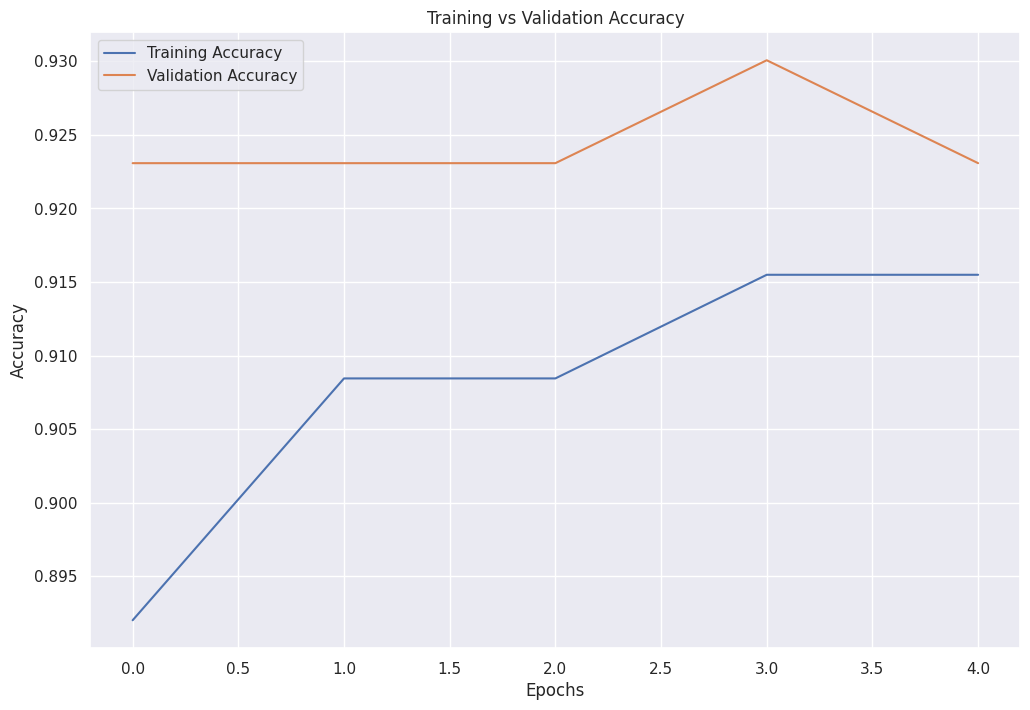

training set accuracy: 0.9061
test set accuracy: 0.9231


In [101]:
train_lstm(standard_train_df, standard_test_df)

### **LSTM Analysis**
This lstm model is a type of reccurent neural network model which models how accurate the predictions of the malignancy of breast cancer nuclei cells were. The model shows 90.61% accuracy of the training set and 92.31% accuracy of the test set. These accuracy scores are relatively high, indicating that the model predicts malignancy fairly well.